<h2 align="center">clustering customer

In [1]:
import pandas as pd
import numpy as np

# Import và xử lý dữ liệu

In [2]:
customer_info = pd.read_excel("F:\\Study\\X-DATA\\KHÓA 4\\Lesson 8\\DA_TEST_2\\Clustering Customer\\customers (UK).xlsx",sheet_name=0)

customer_info.head(5)

,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
0,0.0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N
1,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2015-12-21,M,2009-10-06,Y
2,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,2015-12-22,F,1990-08-04,Y
3,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,2015-12-22,M,1974-07-24,N
4,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,2015-12-22,M,1981-08-13,N


In [3]:
items = pd.read_excel('F:\\Study\\X-DATA\\KHÓA 4\\Lesson 8\\DA_TEST_2\\Clustering Customer\\customers (UK).xlsx',sheet_name=1)

items.head(5)

,ItemID,Product,Brand,SellPrice,CostPrice
0,1.0,032irview0.686128260621012,"Ki)D3jDmA,RIP68X",943.0,359.0
1,2.0,070ttream0.518887735674677,GO4582ey<S!+k1VE,717.0,207.0
2,3.0,070htream0.333307794468401,G.Kb^jz*soY!(-4Q,739.0,199.0
3,4.0,100Grseys0.271522111052549,Dr|vm[-5p~56Y\mk,532.0,262.0
4,5.0,100[nside0.645837365801341,Dr|vm[-5p~56Y\mk,593.0,392.0


In [4]:
customer_trans = pd.read_excel('F:\\Study\\X-DATA\\KHÓA 4\\Lesson 8\\DA_TEST_2\\Clustering Customer\\customers (UK).xlsx',sheet_name=2)

customer_trans.head(5)

,OrderID,CustomerID,ItemID,TransactionDate,Channel
0,0.0,0.0,352.0,2020-03-21,In Store
1,0.0,0.0,3433.0,2020-07-14,In Store
2,0.0,0.0,11162.0,2020-08-09,In Store
3,0.0,0.0,13011.0,2020-12-07,In Store
4,0.0,0.0,13885.0,2020-11-08,In Store


In [5]:
traffic_01 = pd.read_excel(r'F:\Study\X-DATA\KHÓA 4\Lesson 8\DA_TEST_2\Clustering Customer\Traffic\2020_01.xlsx',sheet_name=0)
traffic_02 = pd.read_excel(r'F:\Study\X-DATA\KHÓA 4\Lesson 8\DA_TEST_2\Clustering Customer\Traffic\2020_02.xlsx',sheet_name=0)
traffic_03 = pd.read_excel(r'F:\Study\X-DATA\KHÓA 4\Lesson 8\DA_TEST_2\Clustering Customer\Traffic\2020_03.xlsx',sheet_name=0)
traffic_04 = pd.read_excel(r'F:\Study\X-DATA\KHÓA 4\Lesson 8\DA_TEST_2\Clustering Customer\Traffic\2020_04.xlsx',sheet_name=0)
traffic_05 = pd.read_excel(r'F:\Study\X-DATA\KHÓA 4\Lesson 8\DA_TEST_2\Clustering Customer\Traffic\2020_05.xlsx',sheet_name=0)
traffic_06 = pd.read_excel(r'F:\Study\X-DATA\KHÓA 4\Lesson 8\DA_TEST_2\Clustering Customer\Traffic\2020_06.xlsx',sheet_name=0)
traffic_07 = pd.read_excel(r'F:\Study\X-DATA\KHÓA 4\Lesson 8\DA_TEST_2\Clustering Customer\Traffic\2020_07.xlsx',sheet_name=0)
traffic_08 = pd.read_excel(r'F:\Study\X-DATA\KHÓA 4\Lesson 8\DA_TEST_2\Clustering Customer\Traffic\2020_08.xlsx',sheet_name=0)
traffic_09 = pd.read_excel(r'F:\Study\X-DATA\KHÓA 4\Lesson 8\DA_TEST_2\Clustering Customer\Traffic\2020_09.xlsx',sheet_name=0)
traffic_10 = pd.read_excel(r'F:\Study\X-DATA\KHÓA 4\Lesson 8\DA_TEST_2\Clustering Customer\Traffic\2020_10.xlsx',sheet_name=0)
traffic_11 = pd.read_excel(r'F:\Study\X-DATA\KHÓA 4\Lesson 8\DA_TEST_2\Clustering Customer\Traffic\2020_11.xlsx',sheet_name=0)
traffic_12 = pd.read_excel(r'F:\Study\X-DATA\KHÓA 4\Lesson 8\DA_TEST_2\Clustering Customer\Traffic\2020_12.xlsx',sheet_name=0)

In [6]:
traffic = pd.concat([traffic_01, traffic_02,traffic_03,traffic_04,traffic_05,\
                     traffic_06,traffic_07,traffic_08,traffic_09,traffic_10,traffic_11,traffic_12],\
                    ignore_index=True)

In [7]:
traffic

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY)
0,/2020/1/032irview0.686128260621012,5669.2,5777.8,6286.4,"Ki)D3jDmA,RIP68X",2020-01-10 16:56:13
1,/2020/1/070ttream0.518887735674677,359.8,370.4,403.4,GO4582ey<S!+k1VE,2020-01-10 05:04:35
2,/2020/1/070htream0.333307794468401,587.6,614.2,657.6,G.Kb^jz*soY!(-4Q,2020-01-16 23:27:08
3,/2020/1/100Grseys0.271522111052549,1284.0,1308.6,1385.4,Dr|vm[-5p~56Y\mk,2020-01-17 12:32:24
4,/2020/1/100[nside0.645837365801341,1846.0,1880.8,2025.0,Dr|vm[-5p~56Y\mk,2020-01-23 05:21:08
...,...,...,...,...,...,...
17884,/2020/12/yinfbowls0.6558670149224,130.0,133.2,142.2,HoXbja)_x007f_qT:ESE8#,2020-12-01 04:55:35
17885,/2020/12/yosolease0.0455049365834417,314.6,325.6,365.2,"YoRQW7@*&5W+~4Y""",2020-12-03 15:25:00
17886,/2020/12/you^-info0.127669879156147,1419.6,1448.4,1615.8,"MouDd/fn,XEARhBp",2020-12-06 23:57:54
17887,/2020/12/youe-info0.729842478879044,483.8,487.6,509.6,"yo4}AUKGso=,?!DX",2020-12-04 05:59:22


In [8]:
traffic['Page URL'].iloc[0].split('/')[-1]

'032irview0.686128260621012'

In [9]:
# Tách Product trong Page URL
traffic['Product'] = range(len(traffic['Page URL']))
for i in range(len(traffic['Page URL'])):
    traffic['Product'][i] = traffic['Page URL'].iloc[i].split('/')[-1]

C:\Users\MINHTR~1\AppData\Local\Temp/ipykernel_12204/3449284719.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic['Product'][i] = traffic['Page URL'].iloc[i].split('/')[-1]
c:\users\minh trong\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
traffic.sort_values('Posted On (DD/MM/YYYY)', ascending=True, inplace=True, ignore_index=True)

In [11]:
traffic.head(5)

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY),Product
0,/2020/1/vanBip-on0.100834672919284,1034.8,1048.4,1134.4,"Vag9""-Z=gN30ND@[",2020-01-01 01:03:02,vanBip-on0.100834672919284
1,/2020/1/fujBdence0.385183712192661,4097.8,4142.6,4457.2,ToOYo&o|?(;MH>V:,2020-01-01 01:46:40,fujBdence0.385183712192661
2,/2020/1/baiXpsule0.236876019278184,642.6,653.8,726.8,PaasB'\_LlDEk`=W,2020-01-01 02:55:07,baiXpsule0.236876019278184
3,/2020/1/artjriner0.183950395687591,3413.0,3469.6,3795.6,Ro7|R40![FY$PS`<,2020-01-01 04:18:00,artjriner0.183950395687591
4,/2020/1/appMn-usd0.284138838758011,1447.0,1465.6,1562.6,MiUNo1$pZkrlcw>M,2020-01-01 04:35:14,appMn-usd0.284138838758011


In [12]:
#merge data

data = customer_trans.merge(customer_info,how='inner',left_on='CustomerID', right_on='ID').\
                    merge(items,how='inner',left_on='ItemID', right_on='ItemID')
#.\merge(traffic,how='inner',left_on='Product', right_on='Product')

In [13]:
data.drop('ID', inplace=True, axis=1)

In [14]:
data

,OrderID,CustomerID,ItemID,TransactionDate,Channel,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter,Product,Brand,SellPrice,CostPrice
0,0.0,0.0,352.0,2020-03-21,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735.0,426.0
1,637.0,57.0,352.0,2020-03-15,In Store,Var0.0876970591979241,Bhan0.0592432181453122,GER - Germany,2016-02-02,F,1966-01-14,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735.0,426.0
2,0.0,0.0,3433.0,2020-07-14,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963.0,491.0
3,1840.0,167.0,3433.0,2020-05-16,In Store,Y0.694526245425698,Pur0.889218979929135,UK - United Kingdom,2015-04-16,M,1972-03-23,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963.0,491.0
4,3386.0,307.0,3433.0,2020-04-23,In Store,Moh0.478682882191102,Khair0.475794987205303,FR - France,2016-06-02,NaN,1989-05-04,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963.0,491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25208,8358.0,769.0,15836.0,2020-10-14,In Store,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,offqrview0.479298708383635,Vi1[g>Gp]F76d[;',197.0,146.0
25209,8359.0,769.0,5847.0,2020-05-27,Online,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,nnactream0.0225798759099386,"NN`~?6_x007f_^%O*KH,[S",833.0,280.0
25210,8362.0,769.0,8727.0,2020-11-18,In Store,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,g-snation0.0993461911005428,WaQqK)2JxI(=dac=,205.0,66.0
25211,8362.0,769.0,13065.0,2020-05-11,In Store,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,undflease0.156012002899051,"Uny~Y,~<rTC^J6py",1012.0,272.0


In [15]:
data.columns

Index(['OrderID', 'CustomerID', 'ItemID', 'TransactionDate', 'Channel',
       'FirstName', 'LastName', 'Country', 'DateJoined', 'Gender', 'Birthday',
       'Newsletter', 'Product', 'Brand', 'SellPrice', 'CostPrice'],
      dtype='object')

In [16]:
data.dtypes

OrderID                   float64
CustomerID                float64
ItemID                    float64
TransactionDate    datetime64[ns]
Channel                    object
FirstName                  object
LastName                   object
Country                    object
DateJoined         datetime64[ns]
Gender                     object
Birthday           datetime64[ns]
Newsletter                 object
Product                    object
Brand                      object
SellPrice                 float64
CostPrice                 float64
dtype: object

# 1.	What is the impact of our website traffic on revenue?

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

## users, uniquePageviews, pageviews by Date

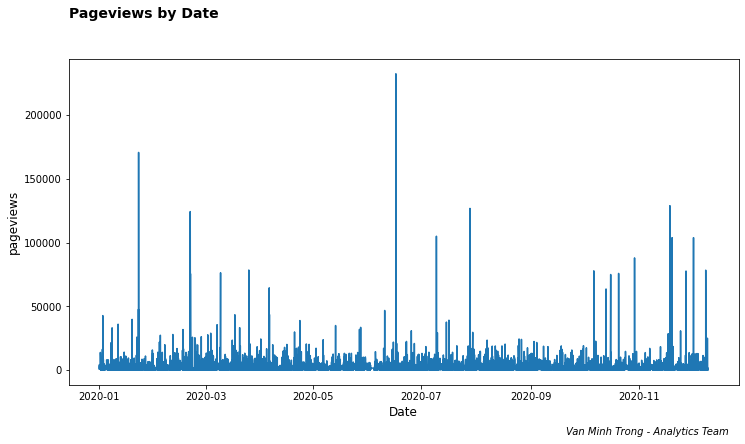

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(traffic['Posted On (DD/MM/YYYY)'],traffic['pageviews'],)


# thêm title, label các trục và source:
plt.suptitle('Pageviews by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Date', size=12)
plt.ylabel('pageviews', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

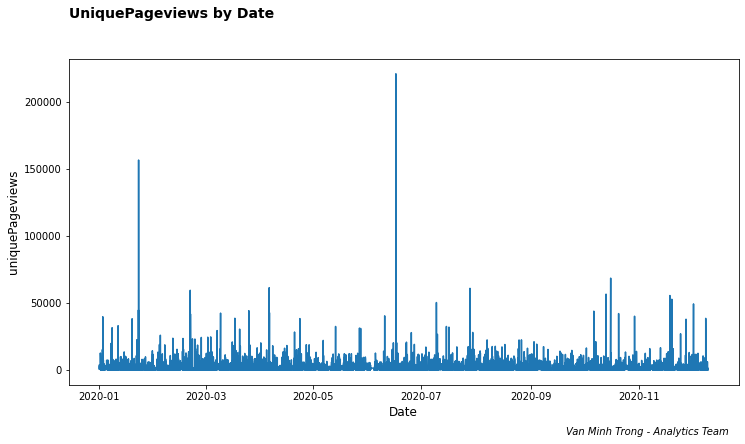

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(traffic['Posted On (DD/MM/YYYY)'],traffic['uniquePageviews'],)


# thêm title, label các trục và source:
plt.suptitle('UniquePageviews by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Date', size=12)
plt.ylabel('uniquePageviews', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

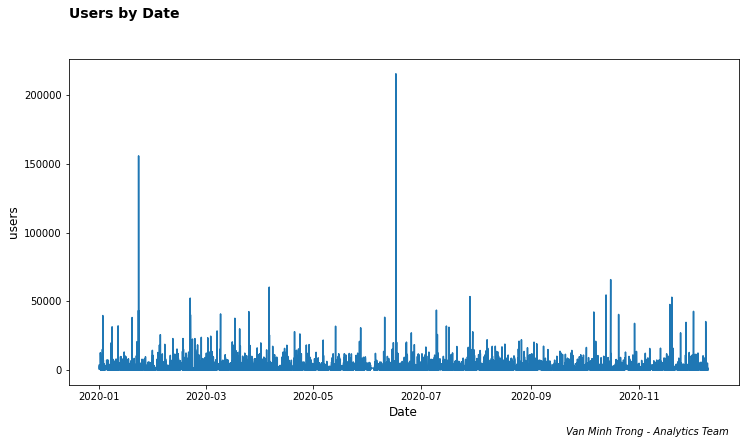

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(traffic['Posted On (DD/MM/YYYY)'],traffic['users'],)


# thêm title, label các trục và source:
plt.suptitle('Users by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Date', size=12)
plt.ylabel('users', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

**Kết luận:** Số lượng users, uniquePageviews, pageviews ổn định, không có xu hướng, có một vài thời điểm có lượng cao đột biến.

## Compare the number of orders, items and revenue between 2 channels: In Store and Online

In [21]:
summary_trans = data.groupby(["TransactionDate","Channel"]).\
                            agg(total_orders = ('OrderID','nunique'),total_items = ('ItemID','size'), total_revenue = ('SellPrice','sum')).\
                            reset_index()

In [22]:
summary_trans

,TransactionDate,Channel,total_orders,total_items,total_revenue
0,2020-01-01,In Store,30,30,23820.0
1,2020-01-01,Online,35,36,32044.0
2,2020-01-02,In Store,33,33,24069.0
3,2020-01-02,Online,40,40,31612.0
4,2020-01-03,In Store,46,46,37118.0
...,...,...,...,...,...
643,2020-12-25,Online,43,43,31365.0
644,2020-12-26,In Store,28,28,23072.0
645,2020-12-26,Online,39,41,33473.0
646,2020-12-27,In Store,45,45,37629.0


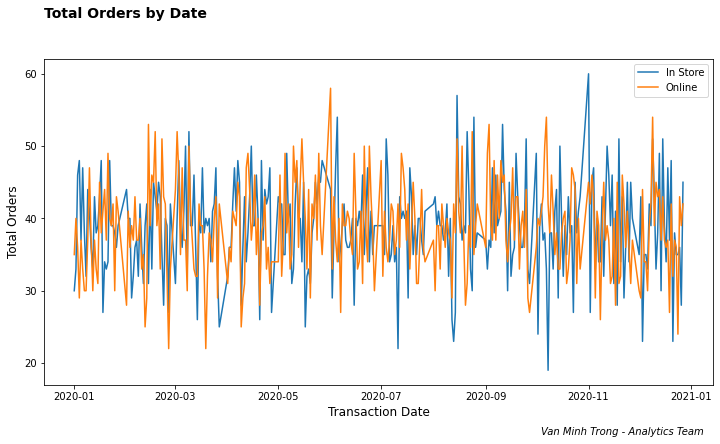

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(summary_trans[summary_trans["Channel"] == "In Store"].TransactionDate,\
        summary_trans[summary_trans["Channel"] == "In Store"].total_orders, \
       label="In Store")

ax.plot(summary_trans[summary_trans["Channel"] == "Online"].TransactionDate,\
        summary_trans[summary_trans["Channel"] == "Online"].total_orders, \
       label="Online")

plt.legend()
# thêm title, label các trục và source:
plt.suptitle('Total Orders by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Transaction Date', size=12)
plt.ylabel('Total Orders', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

Không có sự khác biệt nhiều về số lượng đơn hàng bán trong ngày thông qua hai kênh Online và In Store

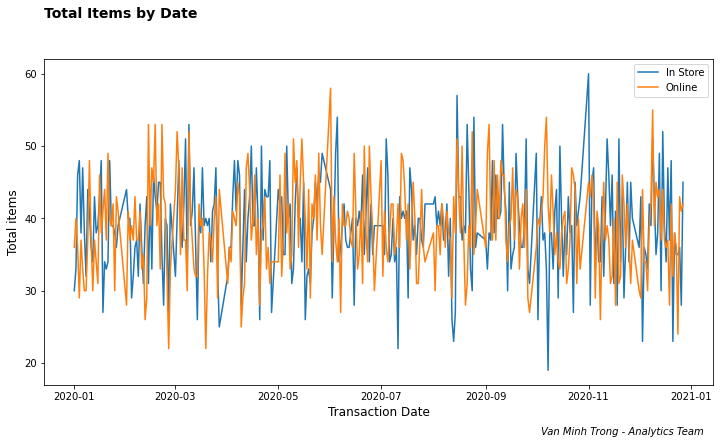

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(summary_trans[summary_trans["Channel"] == "In Store"].TransactionDate,\
        summary_trans[summary_trans["Channel"] == "In Store"].total_items, \
       label="In Store")

ax.plot(summary_trans[summary_trans["Channel"] == "Online"].TransactionDate,\
        summary_trans[summary_trans["Channel"] == "Online"].total_items, \
       label="Online")

plt.legend()
# thêm title, label các trục và source:
plt.suptitle('Total Items by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Transaction Date', size=12)
plt.ylabel('Total items', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

Không có sự khác biệt nhiều về số lượng sản phẩm bán trong ngày thông qua hai kênh Online và In Store

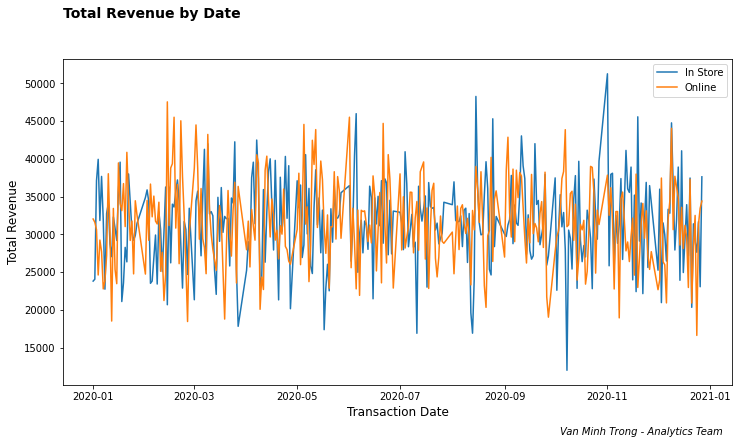

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(summary_trans[summary_trans["Channel"] == "In Store"].TransactionDate,\
        summary_trans[summary_trans["Channel"] == "In Store"].total_revenue, \
       label="In Store")

ax.plot(summary_trans[summary_trans["Channel"] == "Online"].TransactionDate,\
        summary_trans[summary_trans["Channel"] == "Online"].total_revenue, \
       label="Online")

plt.legend()
# thêm title, label các trục và source:
plt.suptitle('Total Revenue by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Transaction Date', size=12)
plt.ylabel('Total Revenue', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

Không có sự khác biệt nhiều về doanh thu bán trong ngày thông qua hai kênh Online và In Store

In [26]:
revenue = data.groupby(["TransactionDate"], as_index=False)\
                        ["SellPrice"]\
                        .agg([np.sum]).reset_index().rename(columns={'sum':'total_revenue'})

In [27]:
revenue

,TransactionDate,total_revenue
0,2020-01-01,55864.0
1,2020-01-02,55681.0
2,2020-01-03,67753.0
3,2020-01-04,64573.0
4,2020-01-05,61098.0
...,...,...
319,2020-12-23,61634.0
320,2020-12-24,44266.0
321,2020-12-25,63062.0
322,2020-12-26,56545.0


In [28]:
from datetime import datetime as dt


In [29]:
traffic['Date'] = traffic['Posted On (DD/MM/YYYY)'].dt.date

In [30]:
traffic

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY),Product,Date
0,/2020/1/vanBip-on0.100834672919284,1034.8,1048.4,1134.4,"Vag9""-Z=gN30ND@[",2020-01-01 01:03:02,vanBip-on0.100834672919284,2020-01-01
1,/2020/1/fujBdence0.385183712192661,4097.8,4142.6,4457.2,ToOYo&o|?(;MH>V:,2020-01-01 01:46:40,fujBdence0.385183712192661,2020-01-01
2,/2020/1/baiXpsule0.236876019278184,642.6,653.8,726.8,PaasB'\_LlDEk`=W,2020-01-01 02:55:07,baiXpsule0.236876019278184,2020-01-01
3,/2020/1/artjriner0.183950395687591,3413.0,3469.6,3795.6,Ro7|R40![FY$PS`<,2020-01-01 04:18:00,artjriner0.183950395687591,2020-01-01
4,/2020/1/appMn-usd0.284138838758011,1447.0,1465.6,1562.6,MiUNo1$pZkrlcw>M,2020-01-01 04:35:14,appMn-usd0.284138838758011,2020-01-01
...,...,...,...,...,...,...,...,...
17884,/2020/12/nicKailer0.757067004243723,369.4,375.8,398.6,NiBtFC>$5gmngibT,2020-12-09 22:18:15,nicKailer0.757067004243723,2020-12-09
17885,/2020/12/j-crvideo0.411325399883596,408.6,419.0,445.0,"J.>4'""@8pZooN<m.",2020-12-09 22:42:10,j-crvideo0.411325399883596,2020-12-09
17886,/2020/12/asak-info0.272774402976534,286.8,291.8,307.6,AsX8Ks>t}q)0=|~C,2020-12-09 22:56:43,asak-info0.272774402976534,2020-12-09
17887,/2020/12/andx-info0.805313550947187,1430.4,1457.8,1580.0,MaYv(\vK4F{`#->J,2020-12-09 23:20:17,andx-info0.805313550947187,2020-12-09


In [31]:
summary_traffic = traffic.groupby(["Date"]).\
                            agg(total_users = ('users','sum'), total_uniquePageviews = ('uniquePageviews','sum'), total_pageviews = ('pageviews','sum')).\
                            reset_index()

In [32]:
summary_traffic

,Date,total_users,total_uniquePageviews,total_pageviews
0,2020-01-01,63755.4,64814.8,70353.6
1,2020-01-02,111861.4,113640.0,122557.8
2,2020-01-03,63749.8,65175.4,71058.0
3,2020-01-04,13946.0,14274.6,15349.6
4,2020-01-05,47065.0,47856.6,51438.2
...,...,...,...,...
338,2020-12-05,23906.0,24678.8,27024.6
339,2020-12-06,25892.8,26517.0,28433.4
340,2020-12-07,95081.8,97565.0,105456.0
341,2020-12-08,100577.0,105419.6,150902.2


In [33]:
summary_traffic['Date'] = pd.to_datetime(summary_traffic['Date'])

In [34]:
revenue_x_traffic = revenue.merge(summary_traffic,how='inner',left_on='TransactionDate', right_on='Date')

In [35]:
revenue_x_traffic.drop('Date', inplace=True, axis=1)

In [36]:
revenue_x_traffic

,TransactionDate,total_revenue,total_users,total_uniquePageviews,total_pageviews
0,2020-01-01,55864.0,63755.4,64814.8,70353.6
1,2020-01-02,55681.0,111861.4,113640.0,122557.8
2,2020-01-03,67753.0,63749.8,65175.4,71058.0
3,2020-01-04,64573.0,13946.0,14274.6,15349.6
4,2020-01-05,61098.0,47065.0,47856.6,51438.2
...,...,...,...,...,...
300,2020-12-05,55953.0,23906.0,24678.8,27024.6
301,2020-12-06,47406.0,25892.8,26517.0,28433.4
302,2020-12-07,65365.0,95081.8,97565.0,105456.0
303,2020-12-08,67222.0,100577.0,105419.6,150902.2


## total_revenue & total_users

In [37]:
import scipy.stats as stats

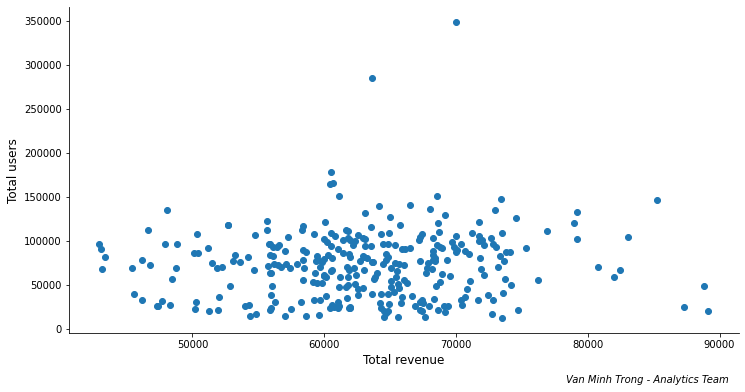

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(revenue_x_traffic['total_revenue'],revenue_x_traffic['total_users'])

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
plt.xlabel('Total revenue', size=12)
plt.ylabel('Total users', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

In [39]:
pearson_coef, p_value = stats.pearsonr(revenue_x_traffic['total_revenue'], revenue_x_traffic['total_users'])
print("Correlation Coefficient là", pearson_coef.round(3))
print("Giá trị P-value là ", p_value.round(3))

Correlation Coefficient là 0.076
Giá trị P-value là  0.184


**total_revenue và total_users không tương quan với nhau**

## total_revenue & total_uniquePageviews

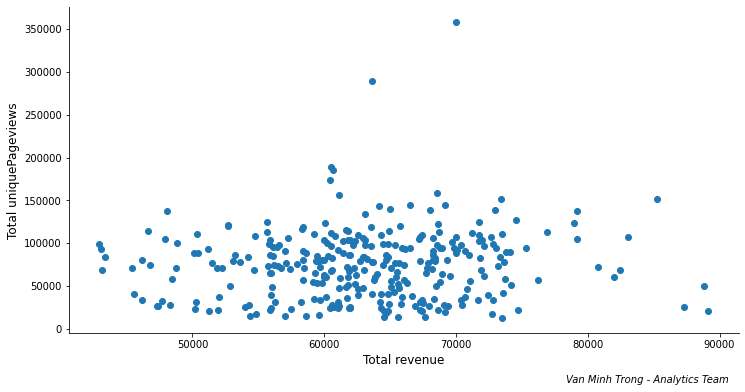

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(revenue_x_traffic['total_revenue'],revenue_x_traffic['total_uniquePageviews'])

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
plt.xlabel('Total revenue', size=12)
plt.ylabel('Total uniquePageviews', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

In [41]:
pearson_coef, p_value = stats.pearsonr(revenue_x_traffic['total_revenue'], revenue_x_traffic['total_uniquePageviews'])
print("Correlation Coefficient là", pearson_coef.round(3))
print("Giá trị P-value là ", p_value.round(3))

Correlation Coefficient là 0.076
Giá trị P-value là  0.188


**total_revenue và total_uniquePageviews không tương quan với nhau**

## total_revenue & total_pageviews

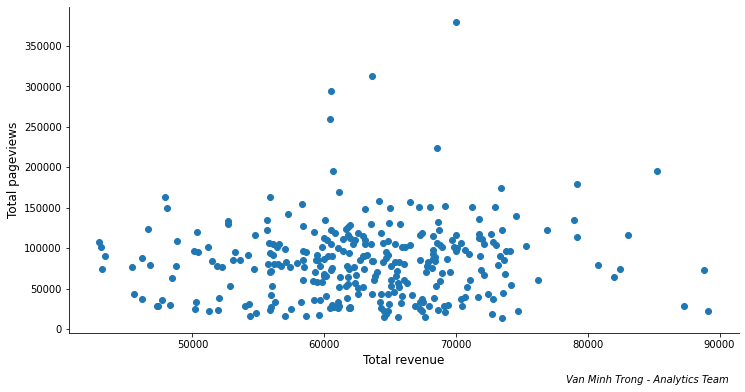

In [42]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(revenue_x_traffic['total_revenue'],revenue_x_traffic['total_pageviews'])

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
plt.xlabel('Total revenue', size=12)
plt.ylabel('Total pageviews', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

In [43]:
pearson_coef, p_value = stats.pearsonr(revenue_x_traffic['total_revenue'], revenue_x_traffic['total_pageviews'])
print("Correlation Coefficient là", pearson_coef.round(3))
print("Giá trị P-value là ", p_value.round(3))

Correlation Coefficient là 0.075
Giá trị P-value là  0.189


**total_revenue và total_pageviews không tương quan với nhau**

**Kết Luận:** Không có yếu tố nào trong dữ liệu website traffic tác động đến revenue

# 2.	Which products get us pageviews and revenue?

### Top 10 sản phẩm mang lại pageviews cao nhất

In [44]:
pageviews = traffic.groupby(["Brand","Product"]).agg(total_pageviews = ('pageviews','sum')).reset_index()

In [45]:
pageviews.sort_values('total_pageviews', ascending=False, inplace=True, ignore_index=True)

In [46]:
pageviews.head(10)

,Brand,Product,total_pageviews
0,So)zm5Pl^_G5t?q,sonEies-x0.139039192479287,232177.0
1,"Ac8IJsKH,4xtY.Tk",porQlease0.507911745358356,170599.0
2,PU]vXmX9fgf$xf!/,pumMvideo0.837931992780922,128891.8
3,BajeQM&IzKX.a8&_,besfeek-50.280274313298435,126771.0
4,LaX{ty9j_zZdD-\`,rogLrecap0.644396392507623,124284.2
5,Stc\9>Cqq;Rn&/|F,jefXaunch0.410067394635876,104984.2
6,"Ch6hNzXa,'=Q=)Wi",chrL-york0.372865344640649,103863.4
7,Wrv1Qv~}Dk7@']x3,wradaunch0.370927222684073,103850.0
8,An1a]{mE?nl\sM%&,angztered0.926486710136623,87999.6
9,Ai/cV(XG>`JN2Ln,goa]akers0.899516668943853,78523.6


In [47]:
top10_views = pageviews.head(10).copy()

In [48]:
top10_views.sort_values('total_pageviews', ascending=True, inplace=True, ignore_index=True)

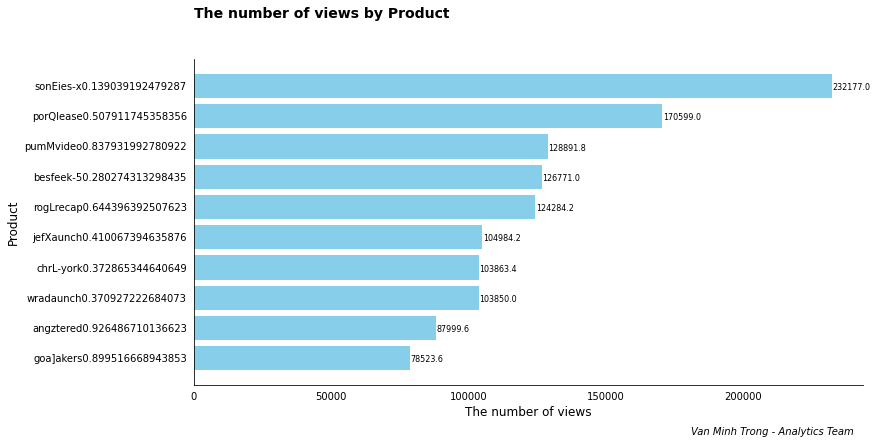

In [49]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(top10_views['Product'],top10_views['total_pageviews'],data=top10_views,color='#87ceeb')

# Show dữ liệu
i = 0
for p in bar1.patches:
    t1 = ax.annotate(top10_views.total_pageviews[i], xy=(p.get_width()+200, p.get_y()+p.get_height()/3))
    t1.set(size=8)
    i+=1
    
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

# thêm title, label các trục và source:
plt.suptitle('The number of views by Product', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('The number of views', size=12)
plt.ylabel('Product', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

### Top 10 sản phẩm mang lại pageviews thấp nhất

In [50]:
top10_views_lowest = pageviews.tail(10).copy().reset_index()

In [51]:
top10_views_lowest

,index,Brand,Product,total_pageviews
0,17879,Ma?Mwli9eyEN''@w,maju-date0.799046146817876,2.0
1,17880,Un3Iq;#h/1zA_`s?,undjcline0.806504582435603,1.8
2,17881,"Ve""""8X{n*HPW!bil",a-cClease0.167928605630817,1.6
3,17882,Ap!FulqmT[82a2/E,facQ-rise0.00977738420521201,0.8
4,17883,Yu%jaXeE/8L$d$yX,yunsement0.44148099082229,0.6
5,17884,OlDe}#G)yIt'+Bc3,recPeator0.470956776867346,0.4
6,17885,"Ac8IJsKH,4xtY.Tk",bobK-news0.573637665518942,0.4
7,17886,Tir72~+xaqy!(G\-,tisetream0.262717438134904,0.4
8,17887,"Ar0eK=K&2^(.""ab~",ariDcle-20.188973495512866,0.4
9,17888,"RoQ+;,f@QlJHzNR&",sylEemand0.214265914271909,0.4


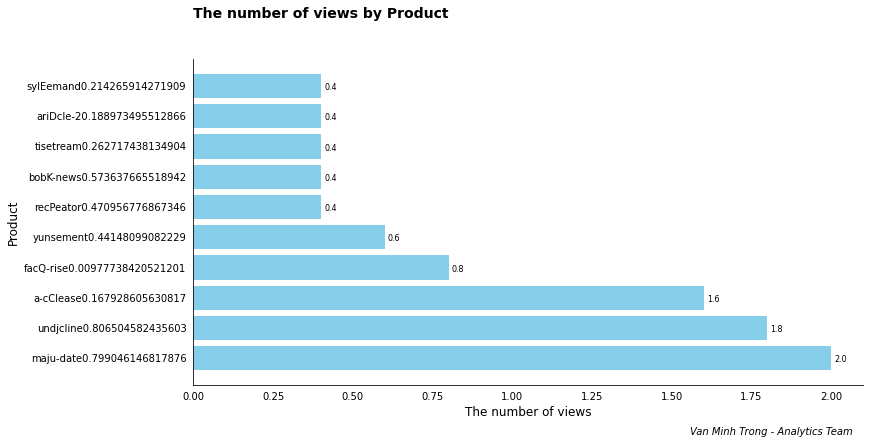

In [52]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(top10_views_lowest['Product'],top10_views_lowest['total_pageviews'],data=top10_views_lowest,color='#87ceeb')

# Show dữ liệu
i = 0
for p in bar1.patches:
    t1 = ax.annotate(top10_views_lowest.total_pageviews[i], xy=(p.get_width()+0.01, p.get_y()+p.get_height()/3))
    t1.set(size=8)
    i+=1
    
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

# thêm title, label các trục và source:
plt.suptitle('The number of views by Product', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('The number of views', size=12)
plt.ylabel('Product', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

## Top 10 sản phẩm mang lại revenue cao nhất

In [53]:
revenue = data.groupby(["Brand","Product"]).agg(total_revenue = ('SellPrice','sum')).reset_index()

In [54]:
revenue.sort_values('total_revenue', ascending=False, inplace=True, ignore_index=True)

In [55]:
revenue.head(10)

,Brand,Product,total_revenue
0,Il^(xPdB:S`#irqz,hypsrview0.321288570724117,11556.0
1,"Relp\+KJ?D,cWw0P",reeelease0.452821711209563,9205.0
2,"Ac8IJsKH,4xtY.Tk",audE-info0.884915261087885,8428.0
3,DiCo4(99zZ<nkafj,kinv-news0.29905739542661,7980.0
4,YMbpE$ev3qMx-h*E,ymc_orson0.319251813809483,7794.0
5,"BMh._Fx~""+dbZy|,",bmwk-20210.31690704020655,7686.0
6,Ap8r`F[}sfP_x007f_->SZ,ubeYanada0.100113795307302,7552.0
7,go@c<p.bPWb1nLrF,titM-info0.550757203954225,7520.0
8,Sa?9zXUH5iJbuE'S,samLement0.78565851365938,7518.0
9,DiL%1<G?YSFM_/TR,dioa-info0.750756927974235,7422.0


In [56]:
top10_revenue = revenue.head(10).copy()

In [57]:
top10_revenue.sort_values('total_revenue', ascending=True, inplace=True, ignore_index=True)

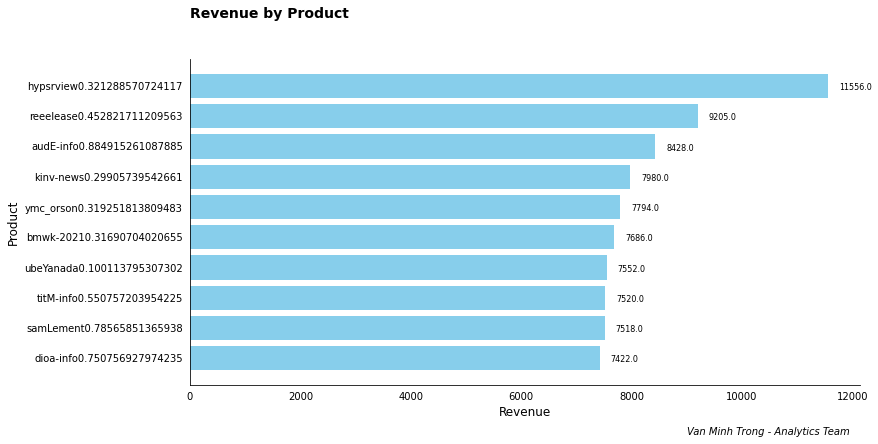

In [58]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(top10_revenue['Product'],top10_revenue['total_revenue'],data=top10_revenue,color='#87ceeb')

# Show dữ liệu
i = 0
for p in bar1.patches:
    t1 = ax.annotate(top10_revenue.total_revenue[i], xy=(p.get_width()+200, p.get_y()+p.get_height()/3))
    t1.set(size=8)
    i+=1
    
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

# thêm title, label các trục và source:
plt.suptitle('Revenue by Product', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('Revenue', size=12)
plt.ylabel('Product', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

## Top 10 sản phẩm mang lại revenue thấp nhất

In [59]:
top10_revenue_lowest = revenue.tail(10).copy().reset_index()

In [60]:
top10_revenue_lowest

,index,Brand,Product,total_revenue
0,13532,LoohpaJQ$v?;1-0b,polWkbook0.608294655546041,81.0
1,13533,Te/6_R<*I)Fc!@S:,teertream0.435511384141963,81.0
2,13534,Ap!FulqmT[82a2/E,secD-info0.408433946152434,78.0
3,13535,Ca@]7ed?aB@_Sdw(,canuement0.946238211030094,77.0
4,13536,Te-'32vNJ;E#BvCC,tenHx-toy0.234647410327591,74.0
5,13537,Bedz04LN6g4NY{R5,2g-aation0.859210237517232,72.0
6,13538,Br0Aza@`0k<LPOVi,g-hxrowns0.35584537222102,69.0
7,13539,Levk)A7u]J|c_tFD,legX-info0.422268138697415,63.0
8,13540,Lo:}7^:YFSc4xYIs,umaZction0.0701712715774042,60.0
9,13541,Wae3Jy6[wA3Y#k7h,wacNkbook0.849290713312118,46.0


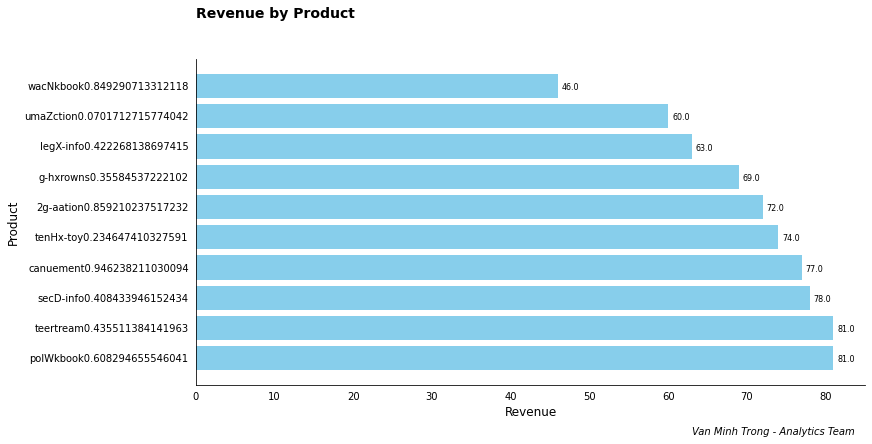

In [61]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(top10_revenue_lowest['Product'],top10_revenue_lowest['total_revenue'],data=top10_revenue_lowest,color='#87ceeb')

# Show dữ liệu
i = 0
for p in bar1.patches:
    t1 = ax.annotate(top10_revenue_lowest.total_revenue[i], xy=(p.get_width()+0.5, p.get_y()+p.get_height()/3))
    t1.set(size=8)
    i+=1
    
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

# thêm title, label các trục và source:
plt.suptitle('Revenue by Product', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('Revenue', size=12)
plt.ylabel('Product', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

# 3.	What customer segments are there?

## Set Data

In [62]:
customer_data = data.groupby(["CustomerID","FirstName", "LastName","Country","Birthday","DateJoined","Newsletter"]).\
                            agg(total_expenditures = ('SellPrice','sum')).\
                            reset_index()

In [63]:
customer_data

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,total_expenditures
0,0.0,V0.296680287495188,L0.104646531512644,FR - France,1968-02-03,2015-12-18,N,32997.0
1,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,34948.0
2,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,17879.0
3,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,14603.0
4,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,37029.0
...,...,...,...,...,...,...,...,...
765,765.0,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,1989-10-25,2016-09-05,N,29538.0
766,766.0,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,1965-07-25,2016-09-05,Y,5331.0
767,767.0,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,1980-11-07,2016-09-05,Y,45470.0
768,768.0,Y0.286774649994125,Aung0.752567424443609,GER - Germany,1980-09-17,2016-09-05,Y,35462.0


In [64]:
from datetime import date

today = date.today()

# tính tuổi
customer_data['Age'] = range(len(customer_data['Birthday']))
for i in range(len(customer_data['Birthday'])):
    customer_data['Age'][i] = today.year - customer_data['Birthday'][i].year

# tính số năm trở thành thành viên
customer_data['Loyalty'] = range(len(customer_data['DateJoined']))
for i in range(len(customer_data['DateJoined'])):
    customer_data['Loyalty'][i] = today.year - customer_data['DateJoined'][i].year

C:\Users\MINHTR~1\AppData\Local\Temp/ipykernel_12204/2439915909.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Age'][i] = today.year - customer_data['Birthday'][i].year
C:\Users\MINHTR~1\AppData\Local\Temp/ipykernel_12204/2439915909.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Loyalty'][i] = today.year - customer_data['DateJoined'][i].year


In [65]:
customer_data

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,total_expenditures,Age,Loyalty
0,0.0,V0.296680287495188,L0.104646531512644,FR - France,1968-02-03,2015-12-18,N,32997.0,54,7
1,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,34948.0,13,7
2,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,17879.0,32,7
3,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,14603.0,48,7
4,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,37029.0,41,7
...,...,...,...,...,...,...,...,...,...,...
765,765.0,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,1989-10-25,2016-09-05,N,29538.0,33,6
766,766.0,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,1965-07-25,2016-09-05,Y,5331.0,57,6
767,767.0,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,1980-11-07,2016-09-05,Y,45470.0,42,6
768,768.0,Y0.286774649994125,Aung0.752567424443609,GER - Germany,1980-09-17,2016-09-05,Y,35462.0,42,6


In [66]:
customer = customer_data.merge(customer_info[['ID','Gender']],how='inner',left_on='CustomerID', right_on='ID')

In [67]:
customer.drop('ID', inplace=True, axis=1)

In [68]:
customer

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,total_expenditures,Age,Loyalty,Gender
0,0.0,V0.296680287495188,L0.104646531512644,FR - France,1968-02-03,2015-12-18,N,32997.0,54,7,NaN
1,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,34948.0,13,7,M
2,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,17879.0,32,7,F
3,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,14603.0,48,7,M
4,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,37029.0,41,7,M
...,...,...,...,...,...,...,...,...,...,...,...
765,765.0,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,1989-10-25,2016-09-05,N,29538.0,33,6,F
766,766.0,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,1965-07-25,2016-09-05,Y,5331.0,57,6,NaN
767,767.0,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,1980-11-07,2016-09-05,Y,45470.0,42,6,M
768,768.0,Y0.286774649994125,Aung0.752567424443609,GER - Germany,1980-09-17,2016-09-05,Y,35462.0,42,6,M


In [69]:
from termcolor import colored
list_=['Country','Newsletter','Loyalty','Gender']
for i in list_:
    print(colored("Column " + i, 'blue', attrs=['bold']))
    print(customer[i].unique())
    print("\n")

Column Country
['FR - France' 'GER - Germany' 'UK - United Kingdom' 'IT - Italy']


Column Newsletter
['N' 'Y']


Column Loyalty
[7 6]


Column Gender
[nan 'M' 'F']




⚡Các trường Country, Newsletter, Loyalty, Gender chứa hữu hạn các giá trị phân biệt, không thích hợp để phân loại khách hàng

⚡ Các trường CustomerID, FirstName, LastName, Birthday, DateJoined không chứa nhiều ý nghĩa để phân loại khách hàng

⚡ Chọn 2 chỉ tiêu là total_expenditures và Age để phân loại phân khúc khách hàng

Chọn **total_expenditures** và **Age** làm giá trị để phân loại tập khách hàng

In [70]:
data_set = customer.iloc[:,[7,8]]

In [71]:
data_set

,total_expenditures,Age
0,32997.0,54
1,34948.0,13
2,17879.0,32
3,14603.0,48
4,37029.0,41
...,...,...
765,29538.0,33
766,5331.0,57
767,45470.0,42
768,35462.0,42


## Build Model

In [72]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [73]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_set)

### elbow test

In [74]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

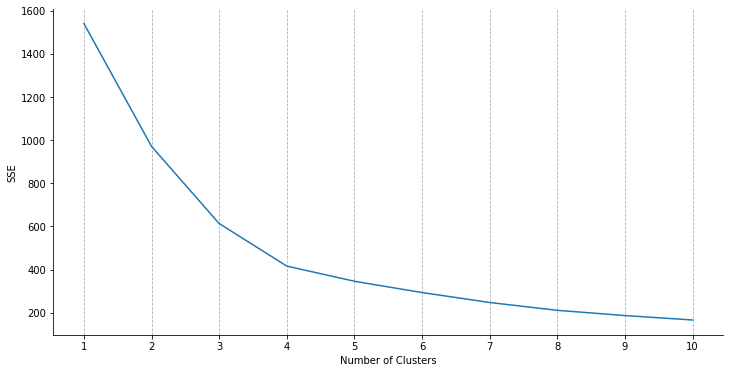

In [75]:
#plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(range(1, 11), sse)

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
    
ax.xaxis.grid(linestyle='dashed')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [76]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

4

### silhouette coefficient

In [77]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

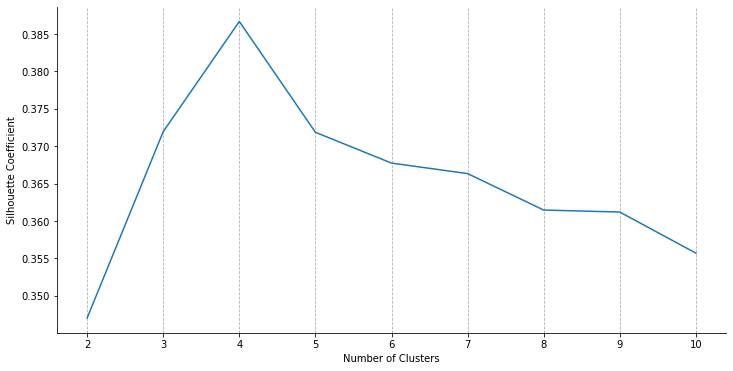

In [78]:
#plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(range(2, 11), silhouette_coefficients)

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
    
ax.xaxis.grid(linestyle='dashed')
plt.xticks(range(2, 11))

plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

**Qua kết quả của 2 bài test, số cụm để phân nhóm khách hàng phù hợp là 4**

**Chạy mô hình với k = 4**

In [79]:
kmeans = KMeans(n_clusters=4,**kmeans_kwargs)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=4, random_state=42)

In [80]:
data_set['Cluster_Labels'] = kmeans.labels_

C:\Users\MINHTR~1\AppData\Local\Temp/ipykernel_12204/3536417683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Cluster_Labels'] = kmeans.labels_


In [81]:
data_set['Cluster_Labels'].value_counts()

1    206
2    194
0    189
3    181
Name: Cluster_Labels, dtype: int64

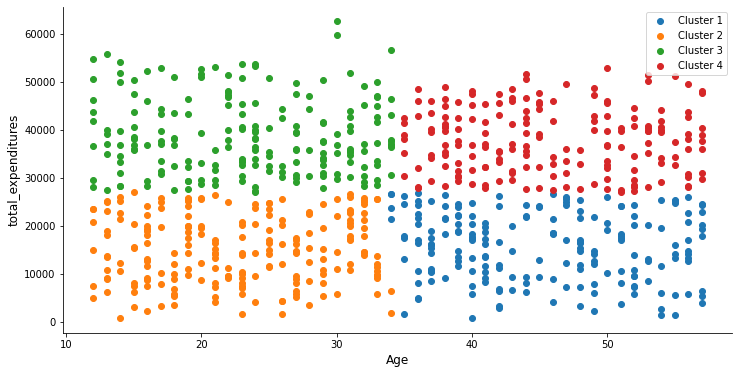

In [82]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(data_set[data_set['Cluster_Labels']==0].Age, data_set[data_set['Cluster_Labels']==0].total_expenditures, label = 'Cluster 1')
ax.scatter(data_set[data_set['Cluster_Labels']==1].Age, data_set[data_set['Cluster_Labels']==1].total_expenditures, label = 'Cluster 2')
ax.scatter(data_set[data_set['Cluster_Labels']==2].Age, data_set[data_set['Cluster_Labels']==2].total_expenditures, label = 'Cluster 3')
ax.scatter(data_set[data_set['Cluster_Labels']==3].Age, data_set[data_set['Cluster_Labels']==3].total_expenditures, label = 'Cluster 4')

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
plt.xlabel('Age', size=12)
plt.ylabel('total_expenditures', size=12)
plt.legend()
plt.show()


**Kết luận:** tập khách hàng có thể chia thành 4 nhóm
 + Nhóm khách hàng dưới 35 tuổi, có mức chi tiêu dưới 25000
 + Nhóm khách hàng dưới 35 tuổi, có mức chi tiêu trên 25000
 + Nhóm khách hàng trên 35 tuổi, có mức chi tiêu dưới 25000
 + Nhóm khách hàng trên 35 tuổi, có mức chi tiêu trên 25000